In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.spatial.distance import cdist, euclidean

In [3]:
site = "https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/"
digits_train = pd.read_csv(site + "optdigits.tra", header=None)
digits_test = pd.read_csv(site + "optdigits.tes", header=None)

In [23]:
cols = digits_train.columns
x_train = digits_train[cols[:64]]
y_train = digits_train[cols[-1]]
x_test = digits_test[cols[:64]]
y_test = digits_test[cols[-1]]

In [26]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(x_train)
# 输出测试集所属的聚类簇中心
# 对于本身具有正确类别信息的数据，可以通过ARI指标来评价准确性
y_pred = kmeans.predict(x_test)
ari = adjusted_rand_score(labels_true=y_test, labels_pred=y_pred)
print(ari)

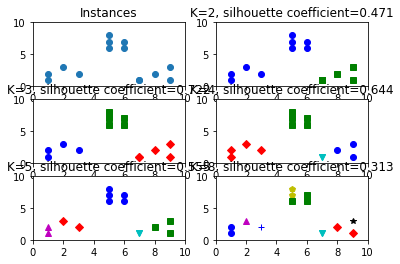

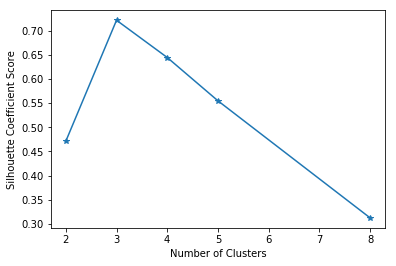

In [11]:
# 用轮廓系数来寻找最优的 K值
%matplotlib inline
x1 = np.array([1,2,3,1,5,6,5,5,6,7,8,9,7,9])
x2 = np.array([1,3,2,2,8,6,7,6,7,1,2,1,1,3])
x = np.array(list(zip(x1,x2))).reshape(len(x1), 2)
plt.subplot(3,2,1)
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title("Instances")
plt.scatter(x1, x2)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
# 待循环求最优的 K值候选
clusters = [2, 3, 4, 5, 8]
subplot_counter = 1
sc_scores = []
for t in clusters:
    subplot_counter += 1
    plt.subplot(3, 2, subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(x)
    for i, label in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[label], marker=markers[label], ls='None')
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    sc_score = silhouette_score(x, kmeans_model.labels_, metric='euclidean')
    sc_scores.append(sc_score)
    plt.title('K=%s, silhouette coefficient=%0.03f' % (t, sc_score))
plt.figure()
plt.plot(clusters, sc_scores, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')
plt.show()

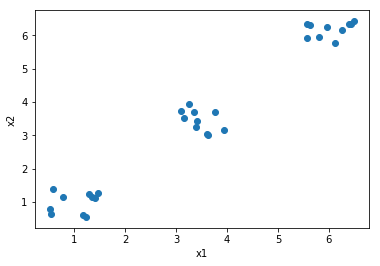

In [21]:
# 肘部法寻找最优 K
cluster1 = np.random.uniform(low=0.5, high=1.5, size=(10,2))
cluster2 = np.random.uniform(low=5.5, high=6.5, size=(10,2))
cluster3 = np.random.uniform(low=3.0, high=4.0, size=(10,2))
x= np.vstack((cluster1, cluster2, cluster3))
plt.scatter(x[:, 0], x[:, 1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

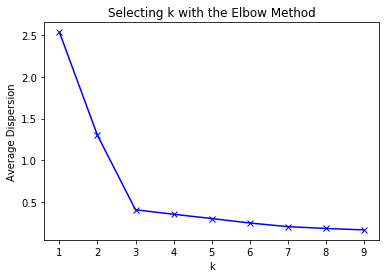

In [51]:
K = range(1, 10)
result = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    # cdist compute each pair points' distance between A array and B array
    # return a distance matrix D with shape of (len(A), len(B))
    # Dij = dist(Ai, Bj)
    # such cal for mean dist between each point and its cluster center is too expensive
    distMat = cdist(x, kmeans.cluster_centers_, metric="euclidean")
    meanDistortion = np.sum(np.min(distMat,axis=1))/x.shape[0]
    
    # Another method to cal mean dist in clust
    ## get cluster center for each point in x 
    xClustCent = kmeans.cluster_centers_[kmeans.labels_]
    distsInClust = [euclidean(x[i], xClustCent[i]) for i in range(x.shape[0])]
    meanDistortion = np.sum(distsInClust)/x.shape[0]
    result.append(meanDistortion)

plt.plot(K, result, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.show()